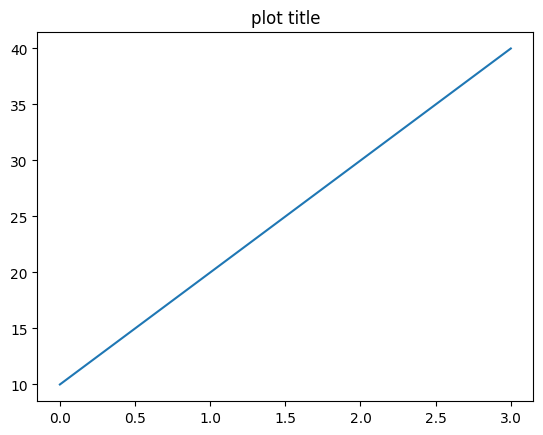

In [11]:
import matplotlib.pyplot as plt
plt.title('plot title')

plt.plot([10, 20, 30, 40])

plt.show()

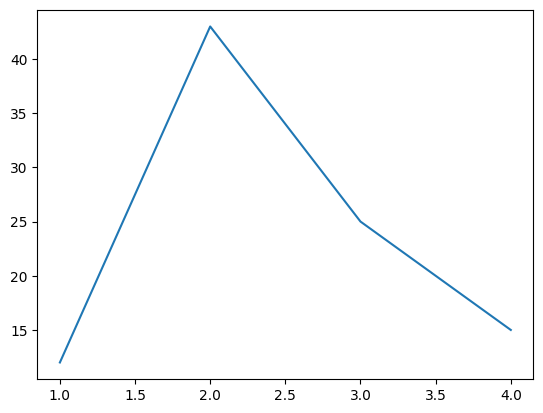

In [12]:
plt.plot([1, 2, 3, 4], [12, 43, 25, 15])
plt.show()

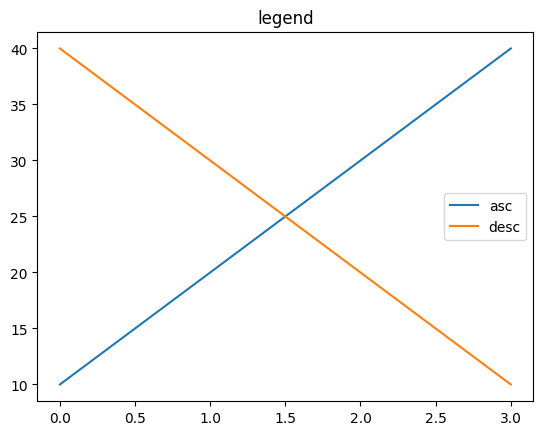

In [13]:
import matplotlib.pyplot as plt
plt.title('legend')

plt.plot([10, 20, 30, 40], label = 'asc')
plt.plot([40, 30, 20, 10], label = 'desc')
plt.legend()

plt.show()

In [ ]:
import matplotlib.pyplot as plt
plt.title('color')

plt.plot([10, 20, 30, 40], color = 'skyblue', label = 'skyblue')
plt.plot([40, 30, 20, 10], color = 'pink', label = 'pink')

plt.legend()
plt.show()

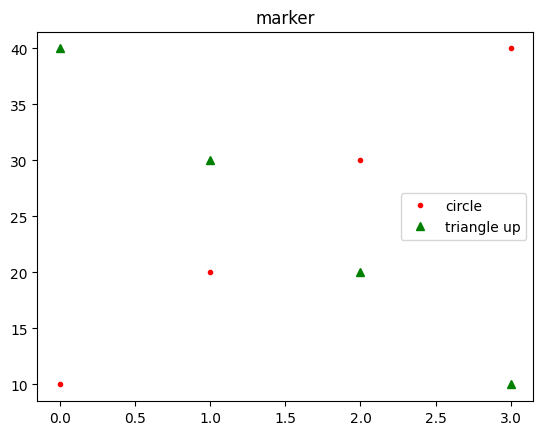

In [10]:
import matplotlib.pyplot as plt

plt.title('marker')
plt.plot([10, 20, 30, 40], 'r.', label = 'circle')

plt.plot([40, 30, 20, 10], 'g^', label = 'triangle up')

plt.legend()
plt.show()

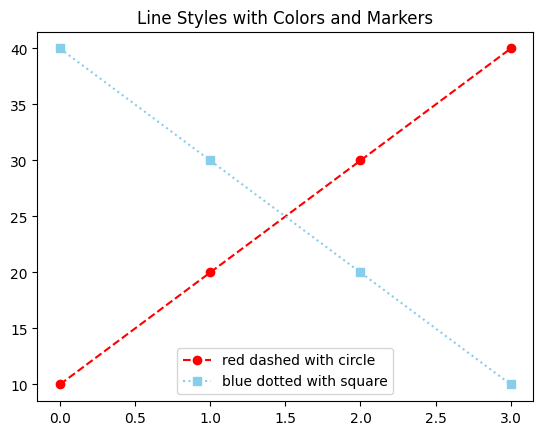

In [17]:
import matplotlib.pyplot as plt

plt.title('Line Styles with Colors and Markers')

# 색상, 마커, 선 스타일을 함께 사용
plt.plot([10, 20, 30, 40], color='red', linestyle='--', marker='o', label='red dashed with circle')
plt.plot([40, 30, 20, 10], color='skyblue', linestyle=':', marker='s', label='blue dotted with square')

plt.legend()
plt.show()

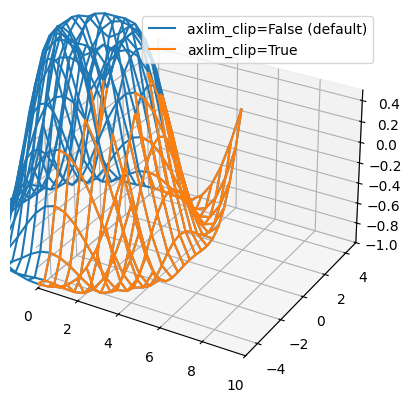

In [18]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Make the data
x = np.arange(-5, 5, 0.5)
y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Default behavior is axlim_clip=False
ax.plot_wireframe(X, Y, Z, color='C0')

# When axlim_clip=True, note that when a line segment has one vertex outside
# the view limits, the entire line is hidden. The same is true for 3D patches
# if one of their vertices is outside the limits (not shown).
ax.plot_wireframe(X, Y, Z, color='C1', axlim_clip=True)

# In this example, data where x < 0 or z > 0.5 is clipped
ax.set(xlim=(0, 10), ylim=(-5, 5), zlim=(-1, 0.5))
ax.legend(['axlim_clip=False (default)', 'axlim_clip=True'])

plt.show()

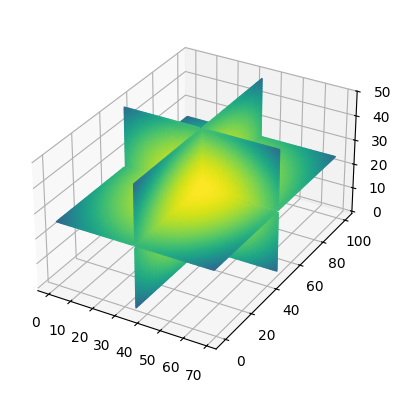

In [19]:
import matplotlib.pyplot as plt
import numpy as np


def plot_quadrants(ax, array, fixed_coord, cmap):
    """For a given 3d *array* plot a plane with *fixed_coord*, using four quadrants."""
    nx, ny, nz = array.shape
    index = {
        'x': (nx // 2, slice(None), slice(None)),
        'y': (slice(None), ny // 2, slice(None)),
        'z': (slice(None), slice(None), nz // 2),
    }[fixed_coord]
    plane_data = array[index]

    n0, n1 = plane_data.shape
    quadrants = [
        plane_data[:n0 // 2, :n1 // 2],
        plane_data[:n0 // 2, n1 // 2:],
        plane_data[n0 // 2:, :n1 // 2],
        plane_data[n0 // 2:, n1 // 2:]
    ]

    min_val = array.min()
    max_val = array.max()

    cmap = plt.get_cmap(cmap)

    for i, quadrant in enumerate(quadrants):
        facecolors = cmap((quadrant - min_val) / (max_val - min_val))
        if fixed_coord == 'x':
            Y, Z = np.mgrid[0:ny // 2, 0:nz // 2]
            X = nx // 2 * np.ones_like(Y)
            Y_offset = (i // 2) * ny // 2
            Z_offset = (i % 2) * nz // 2
            ax.plot_surface(X, Y + Y_offset, Z + Z_offset, rstride=1, cstride=1,
                            facecolors=facecolors, shade=False)
        elif fixed_coord == 'y':
            X, Z = np.mgrid[0:nx // 2, 0:nz // 2]
            Y = ny // 2 * np.ones_like(X)
            X_offset = (i // 2) * nx // 2
            Z_offset = (i % 2) * nz // 2
            ax.plot_surface(X + X_offset, Y, Z + Z_offset, rstride=1, cstride=1,
                            facecolors=facecolors, shade=False)
        elif fixed_coord == 'z':
            X, Y = np.mgrid[0:nx // 2, 0:ny // 2]
            Z = nz // 2 * np.ones_like(X)
            X_offset = (i // 2) * nx // 2
            Y_offset = (i % 2) * ny // 2
            ax.plot_surface(X + X_offset, Y + Y_offset, Z, rstride=1, cstride=1,
                            facecolors=facecolors, shade=False)


def figure_3D_array_slices(array, cmap=None):
    """Plot a 3d array using three intersecting centered planes."""
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.set_box_aspect(array.shape)
    plot_quadrants(ax, array, 'x', cmap=cmap)
    plot_quadrants(ax, array, 'y', cmap=cmap)
    plot_quadrants(ax, array, 'z', cmap=cmap)
    return fig, ax


nx, ny, nz = 70, 100, 50
r_square = (np.mgrid[-1:1:1j * nx, -1:1:1j * ny, -1:1:1j * nz] ** 2).sum(0)

figure_3D_array_slices(r_square, cmap='viridis_r')
plt.show()

c:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


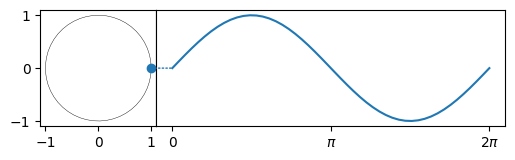

In [29]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib.patches import ConnectionPatch

fig, (axl, axr) = plt.subplots(
    ncols=2,
    sharey=True,
    figsize=(6, 2),
    gridspec_kw=dict(width_ratios=[1, 3], wspace=0),
)
axl.set_aspect(1)
axr.set_box_aspect(1 / 3)
axr.yaxis.set_visible(False)
axr.xaxis.set_ticks([0, np.pi, 2 * np.pi], ["0", r"$\pi$", r"$2\pi$"])

# draw circle with initial point in left Axes
x = np.linspace(0, 2 * np.pi, 50)
axl.plot(np.cos(x), np.sin(x), "k", lw=0.3)
point, = axl.plot(1, 0, "o")

# draw full curve to set view limits in right Axes
sine, = axr.plot(x, np.sin(x))

# draw connecting line between both graphs
con = ConnectionPatch(
    (1, 0),
    (0, 0),
    "data",
    "data",
    axesA=axl,
    axesB=axr,
    color="C0",
    ls="dotted",
)
fig.add_artist(con)

def animate(i):
    # 프레임당 점의 개수를 계산
    num_points = max(1, int(i * 25 / np.pi))
    x_vals = np.linspace(0, i, num_points)
    sine.set_data(x_vals, np.sin(x_vals))
    
    # 원 위의 점 위치
    x_pos, y_pos = np.cos(i), np.sin(i)
    point.set_data([x_pos], [y_pos])
    
    # 연결선 업데이트
    con.xy1 = x_pos, y_pos
    con.xy2 = i, y_pos
    
    return point, sine, con

# 애니메이션 객체를 변수에 할당하여 유지
anim = animation.FuncAnimation(
    fig,
    animate,
    interval=50,
    blit=False,
    frames=x,
    repeat=True,
    repeat_delay=100,
)

plt.show()
anim.save('sine_animation.gif', writer='pillow', fps=20)
# GIF 저장은 선택사항 - 필요할 때만 실행
# anim.save('sine_animation.gif', writer='pillow', fps=20)

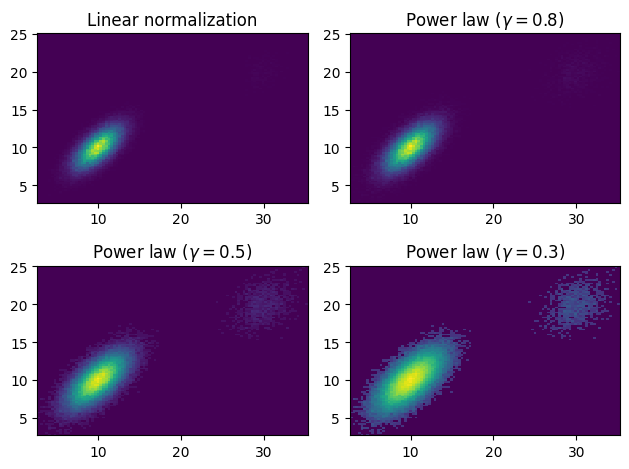

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import multivariate_normal

import matplotlib.colors as mcolors

# Fixing random state for reproducibility.
np.random.seed(19680801)

data = np.vstack([
    multivariate_normal([10, 10], [[3, 2], [2, 3]], size=100000),
    multivariate_normal([30, 20], [[3, 1], [1, 3]], size=1000)
])

gammas = [0.8, 0.5, 0.3]

fig, axs = plt.subplots(nrows=2, ncols=2)

axs[0, 0].set_title('Linear normalization')
axs[0, 0].hist2d(data[:, 0], data[:, 1], bins=100)

for ax, gamma in zip(axs.flat[1:], gammas):
    ax.set_title(r'Power law $(\gamma=%1.1f)$' % gamma)
    ax.hist2d(data[:, 0], data[:, 1], bins=100, norm=mcolors.PowerNorm(gamma))

fig.tight_layout()

plt.show()

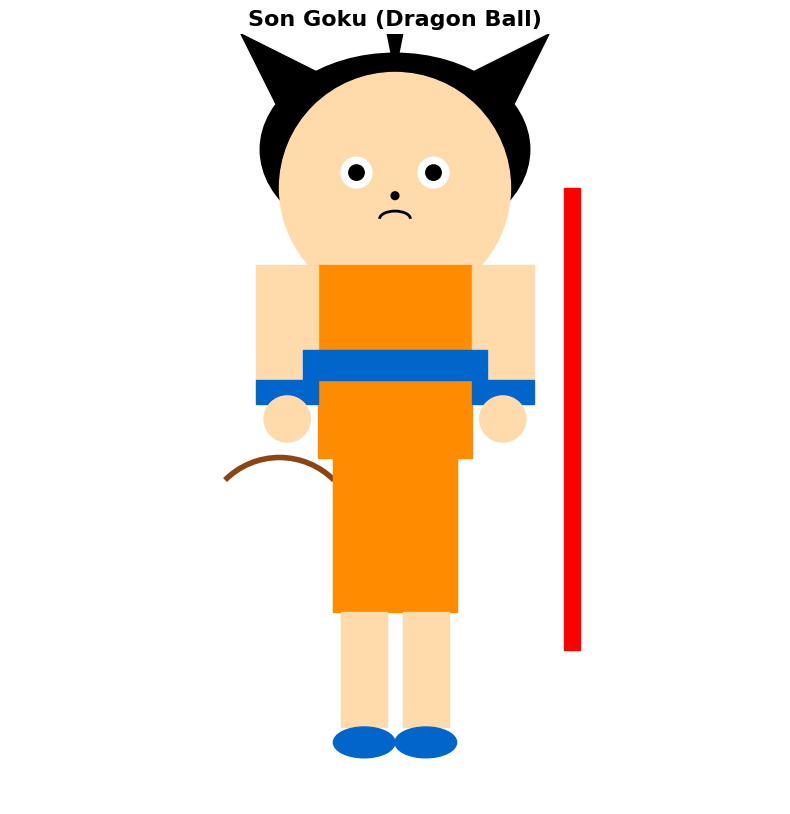

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(8, 10))

# 배경색 설정
ax.set_facecolor('white')

# 머리카락 (검은색)
hair = patches.Ellipse((0.5, 0.85), 0.35, 0.25, color='black', zorder=1)
ax.add_patch(hair)

# 머리카락 스파이크들
spikes = [
    patches.Polygon([(0.35, 0.9), (0.3, 1.0), (0.4, 0.95)], color='black', zorder=1),
    patches.Polygon([(0.5, 0.95), (0.48, 1.05), (0.52, 1.05)], color='black', zorder=1),
    patches.Polygon([(0.65, 0.9), (0.7, 1.0), (0.6, 0.95)], color='black', zorder=1),
]
for spike in spikes:
    ax.add_patch(spike)

# 얼굴 (살색)
face = patches.Circle((0.5, 0.8), 0.15, color='#FFDBAC', zorder=2)
ax.add_patch(face)

# 눈
left_eye = patches.Circle((0.45, 0.82), 0.02, color='white', zorder=3)
right_eye = patches.Circle((0.55, 0.82), 0.02, color='white', zorder=3)
ax.add_patch(left_eye)
ax.add_patch(right_eye)

# 눈동자
left_pupil = patches.Circle((0.45, 0.82), 0.01, color='black', zorder=4)
right_pupil = patches.Circle((0.55, 0.82), 0.01, color='black', zorder=4)
ax.add_patch(left_pupil)
ax.add_patch(right_pupil)

# 코
nose = patches.Circle((0.5, 0.79), 0.005, color='black', zorder=3)
ax.add_patch(nose)

# 입
mouth = patches.Arc((0.5, 0.76), 0.04, 0.02, angle=0, theta1=0, theta2=180, color='black', linewidth=2, zorder=3)
ax.add_patch(mouth)

# 몸통 (오렌지 도복)
body = patches.Rectangle((0.4, 0.45), 0.2, 0.25, color='#FF8C00', zorder=2)
ax.add_patch(body)

# 파란색 벨트
belt = patches.Rectangle((0.38, 0.55), 0.24, 0.04, color='#0066CC', zorder=3)
ax.add_patch(belt)

# 팔 (살색)
left_arm = patches.Rectangle((0.32, 0.55), 0.08, 0.15, color='#FFDBAC', zorder=2)
right_arm = patches.Rectangle((0.6, 0.55), 0.08, 0.15, color='#FFDBAC', zorder=2)
ax.add_patch(left_arm)
ax.add_patch(right_arm)

# 팔목 밴드 (파란색)
left_wristband = patches.Rectangle((0.32, 0.52), 0.08, 0.03, color='#0066CC', zorder=3)
right_wristband = patches.Rectangle((0.6, 0.52), 0.08, 0.03, color='#0066CC', zorder=3)
ax.add_patch(left_wristband)
ax.add_patch(right_wristband)

# 손 (살색)
left_hand = patches.Circle((0.36, 0.5), 0.03, color='#FFDBAC', zorder=3)
right_hand = patches.Circle((0.64, 0.5), 0.03, color='#FFDBAC', zorder=3)
ax.add_patch(left_hand)
ax.add_patch(right_hand)

# 여의봉 (빨간색)
stick = patches.Rectangle((0.72, 0.2), 0.02, 0.6, color='red', zorder=1)
ax.add_patch(stick)

# 바지 (오렌지색)
pants = patches.Rectangle((0.42, 0.25), 0.16, 0.2, color='#FF8C00', zorder=2)
ax.add_patch(pants)

# 다리 (살색)
left_leg = patches.Rectangle((0.43, 0.1), 0.06, 0.15, color='#FFDBAC', zorder=2)
right_leg = patches.Rectangle((0.51, 0.1), 0.06, 0.15, color='#FFDBAC', zorder=2)
ax.add_patch(left_leg)
ax.add_patch(right_leg)

# 신발 (파란색)
left_shoe = patches.Ellipse((0.46, 0.08), 0.08, 0.04, color='#0066CC', zorder=3)
right_shoe = patches.Ellipse((0.54, 0.08), 0.08, 0.04, color='#0066CC', zorder=3)
ax.add_patch(left_shoe)
ax.add_patch(right_shoe)

# 꼬리 (갈색)
tail = patches.Arc((0.35, 0.35), 0.2, 0.2, angle=45, theta1=0, theta2=90, color='#8B4513', linewidth=4, zorder=1)
ax.add_patch(tail)

# 축 설정
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Son Goku (Dragon Ball)', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.show()